In [1]:
import yfinance as yf
import pandas as pd
from pymongo import MongoClient


# List of stock symbols
symbols = ['UNH', 'PFE', 'INCY', 'TMO', 'MRK', 'SGEN', 'LLY', 'BMRN', 'ZBH']

# Function to get historical stock data
def get_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

# Initialize an empty DataFrame
stock_data_df = pd.DataFrame()

# Specify the date range
start_date = '2020-01-01'
end_date = '2021-12-31'

# Loop through each symbol and fetch data
for symbol in symbols:
    # Get historical stock data
    stock_data = get_stock_data(symbol, start_date, end_date)
    # Add a column for the stock symbol
    stock_data['Symbol'] = symbol
    # Append the stock data to the main DataFrame
    stock_data_df = stock_data_df.append(stock_data)

# Reset the index of the DataFrame
stock_data_df.reset_index(inplace=True)

# Display the DataFrame
df = stock_data_df


C:\Users\smula\AppData\Local\Temp\ipykernel_15752\3944765226.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data_df = stock_data_df.append(stock_data)
C:\Users\smula\AppData\Local\Temp\ipykernel_15752\3944765226.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data_df = stock_data_df.append(stock_data)
C:\Users\smula\AppData\Local\Temp\ipykernel_15752\3944765226.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data_df = stock_data_df.append(stock_data)
C:\Users\smula\AppData\Local\Temp\ipykernel_15752\3944765226.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data_df = stock_data_df.append(stoc

In [5]:
df.to_csv('HealthStocks.csv')

In [3]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Modify the Date values as per your requirement
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')

# Print the modified DataFrame
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol
0,02/01/2020,277.426888,279.050042,273.472812,276.030212,2543400,0.00000,0.0,UNH
1,03/01/2020,271.094767,275.445208,268.348616,273.236969,2711400,0.00000,0.0,UNH
2,06/01/2020,271.783569,275.237488,271.047489,275.133667,3079100,0.00000,0.0,UNH
3,07/01/2020,274.331573,275.077070,271.387227,273.472809,2492900,0.00000,0.0,UNH
4,08/01/2020,275.086556,280.635476,273.708772,279.238800,3379200,0.00000,0.0,UNH
...,...,...,...,...,...,...,...,...,...
4531,23/12/2021,120.061932,121.418786,119.335734,121.342339,1438704,0.00000,0.0,ZBH
4532,27/12/2021,121.572098,122.424132,119.973353,122.357117,1221065,0.23301,0.0,ZBH
4533,28/12/2021,122.261385,123.860137,122.108216,122.740059,1506581,0.00000,0.0,ZBH
4534,29/12/2021,122.615602,123.869710,122.290104,122.759201,2508771,0.00000,0.0,ZBH


In [2]:
import pandas as pd

# Assuming your CSV files are named file1.csv and file2.csv
file1 = 'FAANG.csv'
file2 = 'HealthStocks.csv'

# Read the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# Append the DataFrames based on the 'Date' column
result_df = df1.append(df2, ignore_index=True)

# Sort the resulting DataFrame based on the 'Date' column
result_df = result_df.sort_values('Date')

# Reset the index of the resulting DataFrame
result_df = result_df.reset_index(drop=True)

result_df = result_df.head(4692)


C:\Users\smula\AppData\Local\Temp\ipykernel_31832\1347350200.py:12: UserWarning: Parsing '13-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\smula\AppData\Local\Temp\ipykernel_31832\1347350200.py:12: UserWarning: Parsing '14-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\smula\AppData\Local\Temp\ipykernel_31832\1347350200.py:12: UserWarning: Parsing '15-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\smula\AppData\Local\Temp\ipykernel_31832\1347350200.py:12: UserWarning: Parsing '16-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df1['Date'] = pd.to_datetime(df1['Date'])
C:\Users\smula\AppDa

In [3]:
df3 = pd.read_csv('covid.csv')

In [12]:
df3.columns

Index(['Date', 'Name of State / UT', 'Latitude', 'Longitude',
       'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated',
       'New cases', 'New deaths', 'New recovered', 'total_tests',
       'total_recovered', 'active_cases'],
      dtype='object')

In [11]:
result_df

,Date,High,Low,Open,Close,Volume,Symbol
0,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK
1,2020-01-04,233.732230,223.145520,226.225808,224.927353,4548800,UNH
2,2020-01-04,74.839996,71.529999,72.050003,74.180000,1966300,INCY
3,2020-01-04,130.093102,126.100881,127.068120,129.362930,3297900,LLY
4,2020-01-04,114.930000,110.400002,111.629997,111.239998,829000,SGEN
...,...,...,...,...,...,...,...
4687,2021-05-01,3223.380000,3165.060000,3166.010000,3218.510000,2655500,Amazon
4688,2021-05-01,71.150642,69.848255,70.512560,70.888420,10956526,MRK
4689,2021-05-01,86.639999,83.680000,86.639999,85.870003,1391000,INCY
4690,2021-05-02,195.269310,193.277363,194.018321,194.162674,2732200,LLY


In [4]:
df3['Date'] = pd.to_datetime(df3['Date'])

# Merge the result_df with your_df based on the 'Date' column
merged_df = pd.merge(result_df, df3, on='Date', how='inner')

C:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-01-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Python\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache

In [18]:
merged_df

,Date,High,Low,Open,Close,Volume,Symbol,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,total_tests,total_recovered,active_cases
0,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Andaman and Nicobar Islands,11.7401,92.6586,10,0,1,0,0,1,893980.0,13664.0,336.0
1,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Andhra Pradesh,15.9129,79.7400,83,0,0,43,0,-1,2303690.0,59491.0,58.0
2,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Assam,26.2006,92.9376,1,0,0,0,0,0,2705422.0,863665.0,20538.0
3,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Bihar,25.0961,85.3131,23,1,0,8,0,0,1767199.0,NaN,NaN
4,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Chandigarh,30.7333,76.7794,16,0,0,3,0,0,2026898.0,303026.0,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45677,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Telangana,18.1124,79.0193,4320,165,1993,0,0,0,6019923.0,773421.0,24653.0
45678,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Tripura,23.9408,91.9882,913,1,278,18,0,39,249149.0,43200.0,25.0
45679,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Uttar Pradesh,26.8467,80.9462,12088,345,7292,478,0,421,2633737.0,624673.0,6173.0
45680,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Uttarakhand,30.0668,79.0193,1643,15,842,81,0,11,30226868.0,NaN,NaN


In [19]:
merged_df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Symbol',
       'Name of State / UT', 'Latitude', 'Longitude', 'Total Confirmed cases',
       'Death', 'Cured/Discharged/Migrated', 'New cases', 'New deaths',
       'New recovered', 'total_tests', 'total_recovered', 'active_cases'],
      dtype='object')

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'your_df'
# Replace this with the actual name of your DataFrame

# Generate 10 different combinations of plots
for i in range(1, 11):
    plt.figure(figsize=(12, 6))
    
    if i == 1:
        # Line plot of 'Close' over time
        sns.lineplot(x='Date', y='Close', data=your_df)
        plt.title('Line Plot of Close Over Time')
    elif i == 2:
        # Bar plot of 'Total Confirmed cases' for each state
        sns.barplot(x='Name of State / UT', y='Total Confirmed cases', data=your_df)
        plt.title('Bar Plot of Total Confirmed cases for Each State')
        plt.xticks(rotation=45, ha='right')
    elif i == 3:
        # Scatter plot of 'High' vs 'Low'
        sns.scatterplot(x='High', y='Low', data=your_df)
        plt.title('Scatter Plot of High vs Low')
    elif i == 4:
        # Box plot of 'New cases' for each state
        sns.boxplot(x='Name of State / UT', y='New cases', data=your_df)
        plt.title('Box Plot of New cases for Each State')
        plt.xticks(rotation=45, ha='right')
    elif i == 5:
        # Histogram of 'Volume'
        sns.histplot(your_df['Volume'], bins=20, kde=True)
        plt.title('Histogram of Volume')
    elif i == 6:
        # Line plot of 'total_tests' over time
        sns.lineplot(x='Date', y='total_tests', data=your_df)
        plt.title('Line Plot of total_tests Over Time')
    elif i == 7:
        # Violin plot of 'Death' for each state
        sns.violinplot(x='Name of State / UT', y='Death', data=your_df)
        plt.title('Violin Plot of Death for Each State')
        plt.xticks(rotation=45, ha='right')
    elif i == 8:
        # Area plot of 'total_recovered' over time
        sns.lineplot(x='Date', y='total_recovered', data=your_df, label='total_recovered')
        sns.lineplot(x='Date', y='active_cases', data=your_df, label='active_cases')
        plt.title('Area Plot of total_recovered and active_cases Over Time')
    elif i == 9:
        # Pair plot for selected numeric columns
        sns.pairplot(your_df[['Close', 'Total Confirmed cases', 'Death', 'New cases']])
        plt.title('Pair Plot of Selected Numeric Columns')
    elif i == 10:
        # Heatmap of correlation matrix for selected columns
        sns.heatmap(your_df[['Close', 'Total Confirmed cases', 'Death', 'New cases']].corr(), annot=True, cmap='coolwarm')
        plt.title('Heatmap of Correlation Matrix')

    plt.tight_layout()
    plt.show()


NameError: name 'your_df' is not defined

<Figure size 1200x600 with 0 Axes>

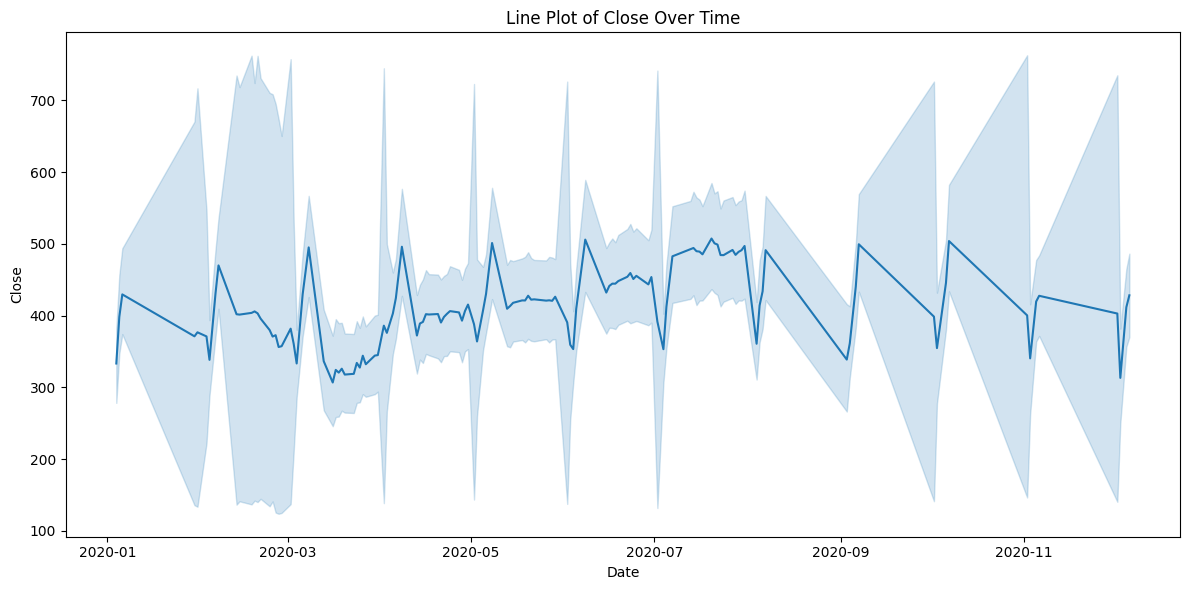

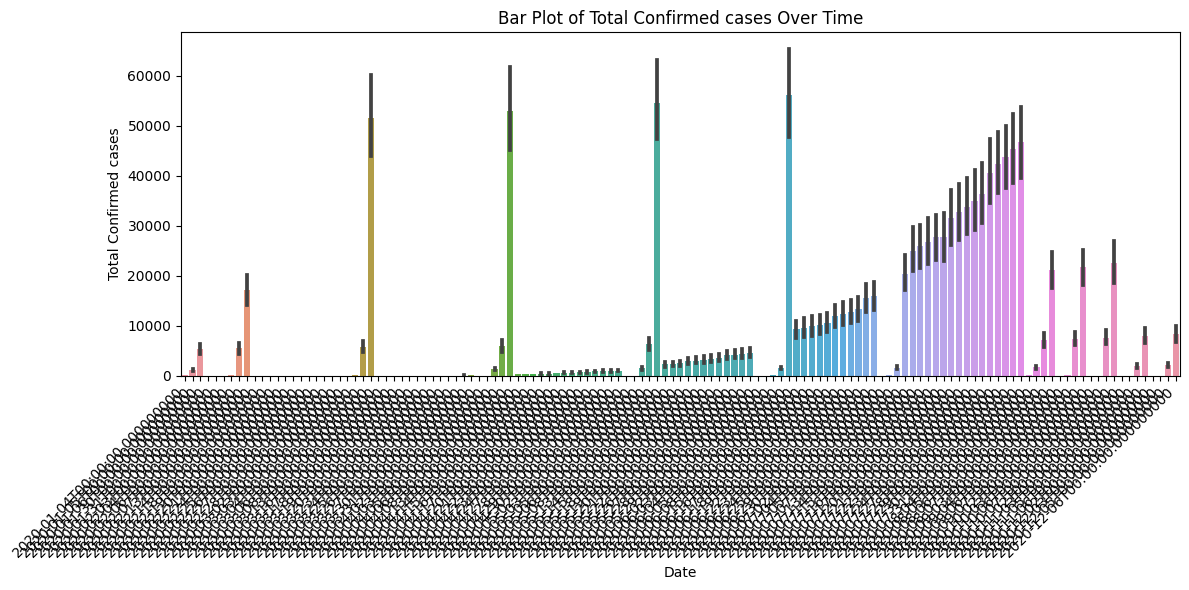

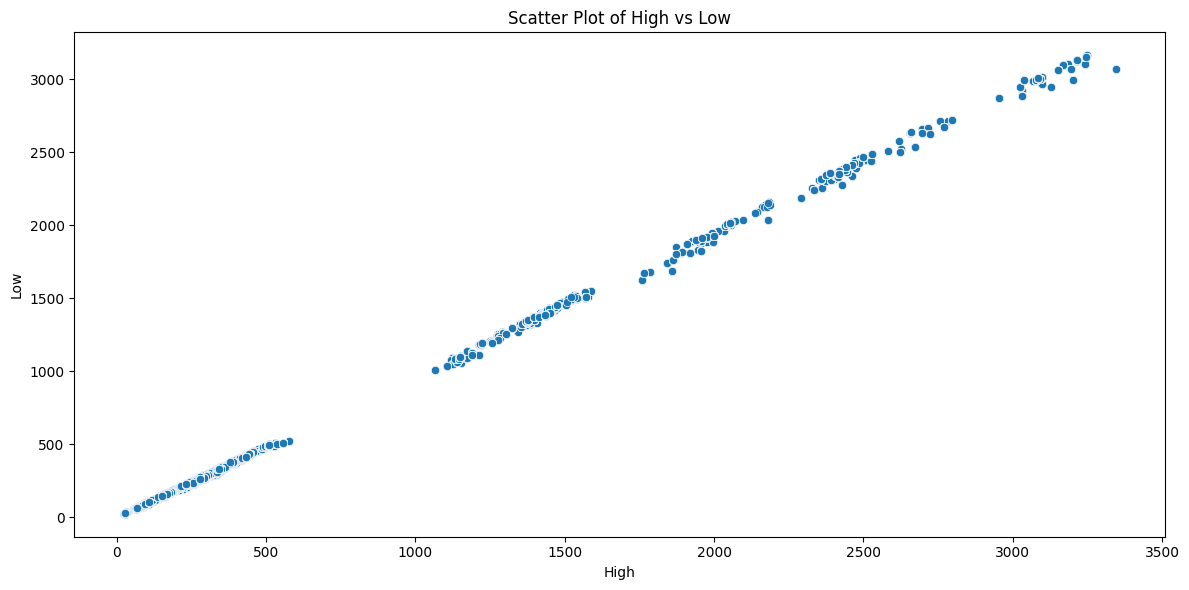

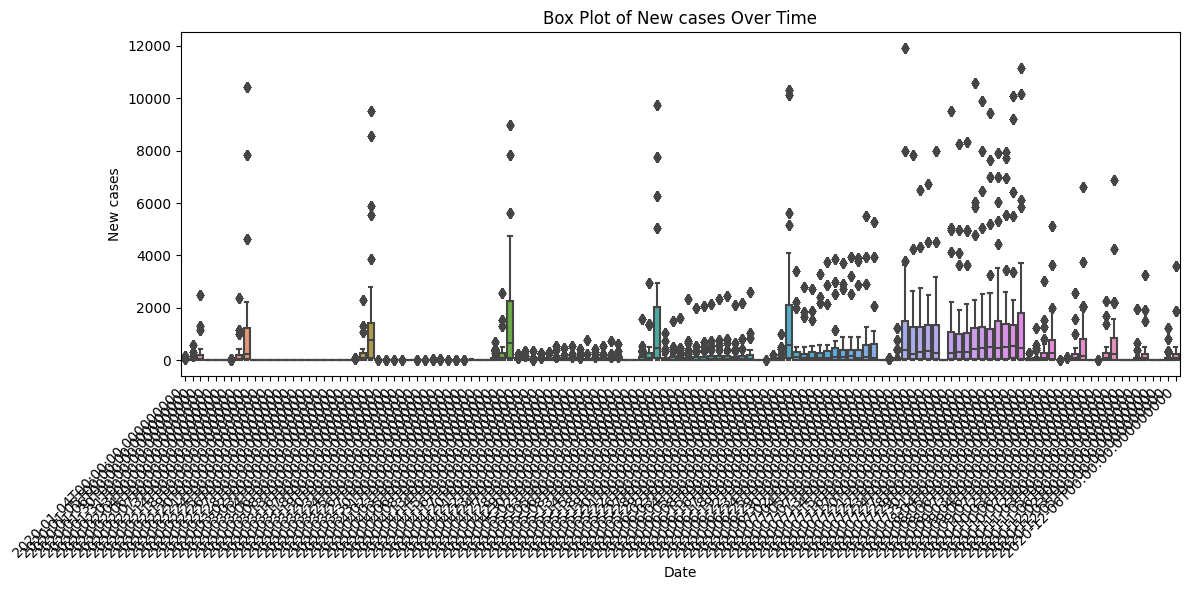

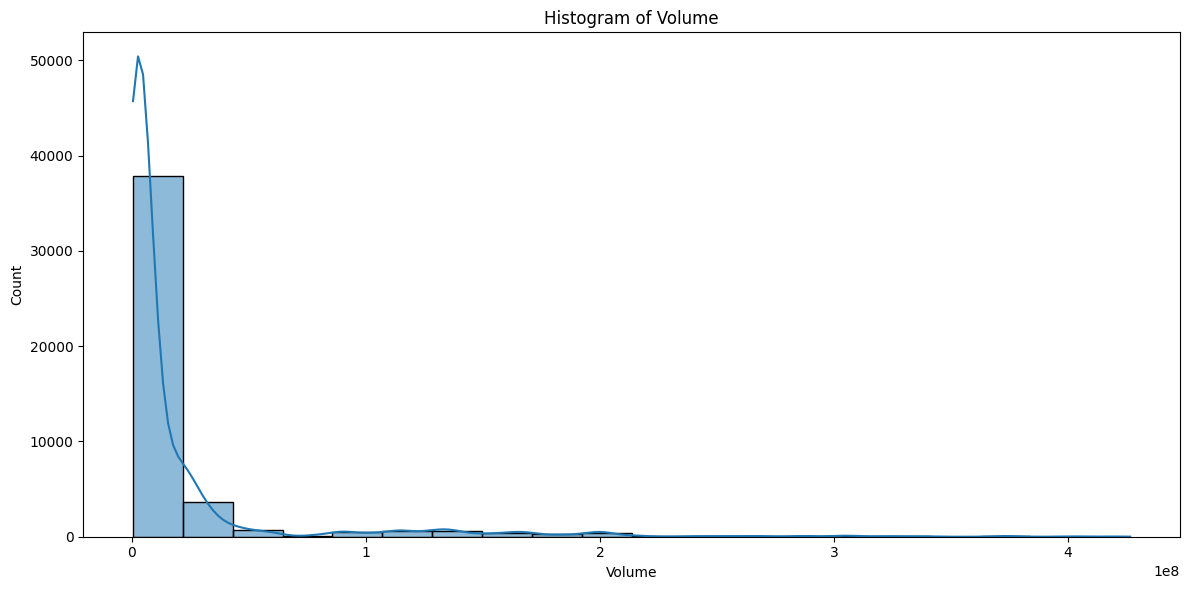

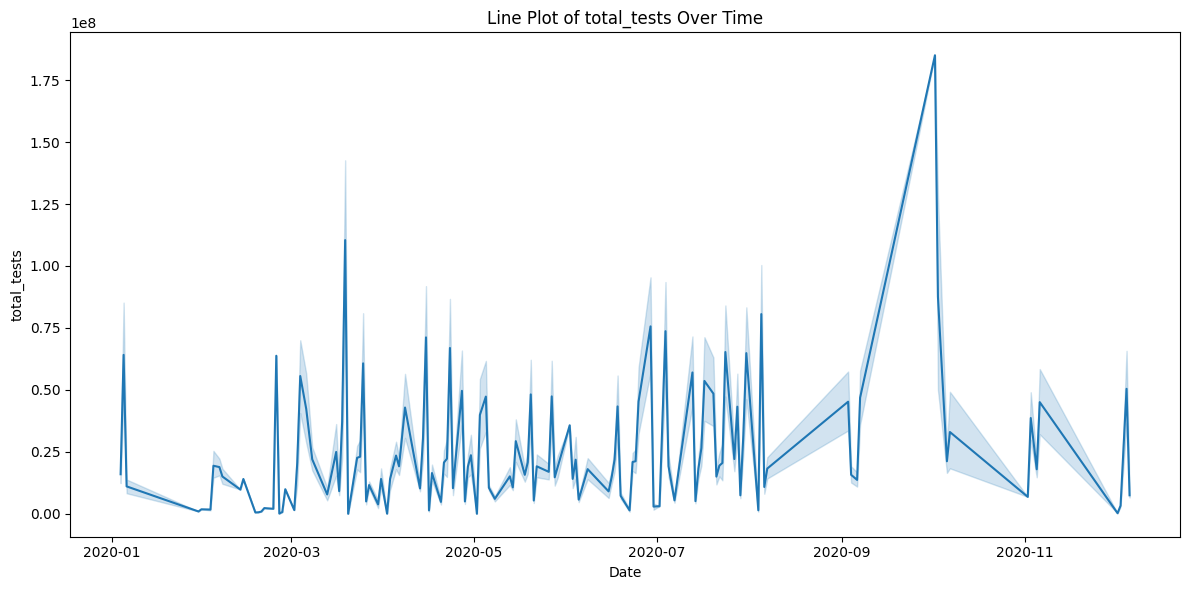

TypeError: The DType <class 'numpy.dtype[float64]'> could not be promoted by <class 'numpy.dtype[datetime64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>)

<Figure size 1200x600 with 0 Axes>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Generate 10 different combinations of plots
for i in range(1, 11):
    plt.figure(figsize=(12, 6))
    
    if i == 1:
        # Line plot of 'Close' over time
        sns.lineplot(x='Date', y='Close', data=merged_df)
        plt.title('Line Plot of Close Over Time')
    elif i == 2:
        # Bar plot of 'Total Confirmed cases'
        sns.barplot(x='Date', y='Total Confirmed cases', data=merged_df)
        plt.title('Bar Plot of Total Confirmed cases Over Time')
        plt.xticks(rotation=45, ha='right')
    elif i == 3:
        # Scatter plot of 'High' vs 'Low'
        sns.scatterplot(x='High', y='Low', data=merged_df)
        plt.title('Scatter Plot of High vs Low')
    elif i == 4:
        # Box plot of 'New cases'
        sns.boxplot(x='Date', y='New cases', data=merged_df)
        plt.title('Box Plot of New cases Over Time')
        plt.xticks(rotation=45, ha='right')
    elif i == 5:
        # Histogram of 'Volume'
        sns.histplot(merged_df['Volume'], bins=20, kde=True)
        plt.title('Histogram of Volume')
    elif i == 6:
        # Line plot of 'total_tests' over time
        sns.lineplot(x='Date', y='total_tests', data=merged_df)
        plt.title('Line Plot of total_tests Over Time')
    elif i == 7:
        # Violin plot of 'Death'
        sns.violinplot(x='Date', y='Death', data=merged_df)
        plt.title('Violin Plot of Death Over Time')
        plt.xticks(rotation=45, ha='right')
    elif i == 8:
        # Area plot of 'total_recovered' and 'active_cases' over time
        sns.lineplot(x='Date', y='total_recovered', data=merged_df, label='total_recovered')
        sns.lineplot(x='Date', y='active_cases', data=merged_df, label='active_cases')
        plt.title('Area Plot of total_recovered and active_cases Over Time')
    elif i == 9:
        # Pair plot for selected numeric columns
        sns.pairplot(merged_df[['Close', 'Total Confirmed cases', 'Death', 'New cases']])
        plt.title('Pair Plot of Selected Numeric Columns')
    elif i == 10:
        # Heatmap of correlation matrix for selected columns
        sns.heatmap(merged_df[['Close', 'Total Confirmed cases', 'Death', 'New cases']].corr(), annot=True, cmap='coolwarm')
        plt.title('Heatmap of Correlation Matrix')

    plt.tight_layout()
    plt.show()


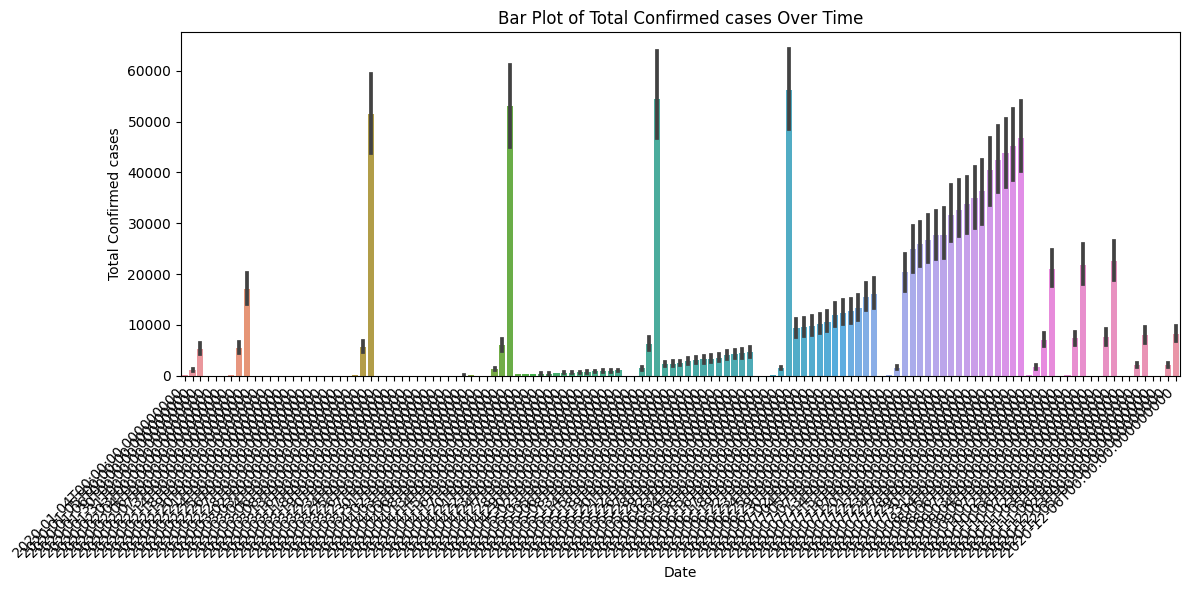

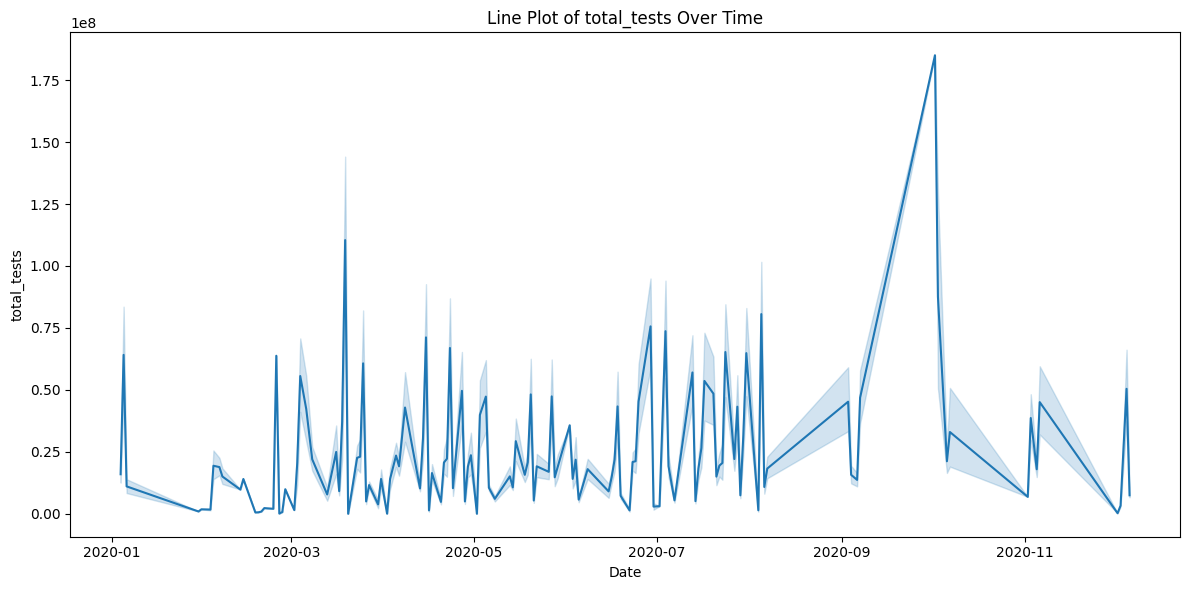

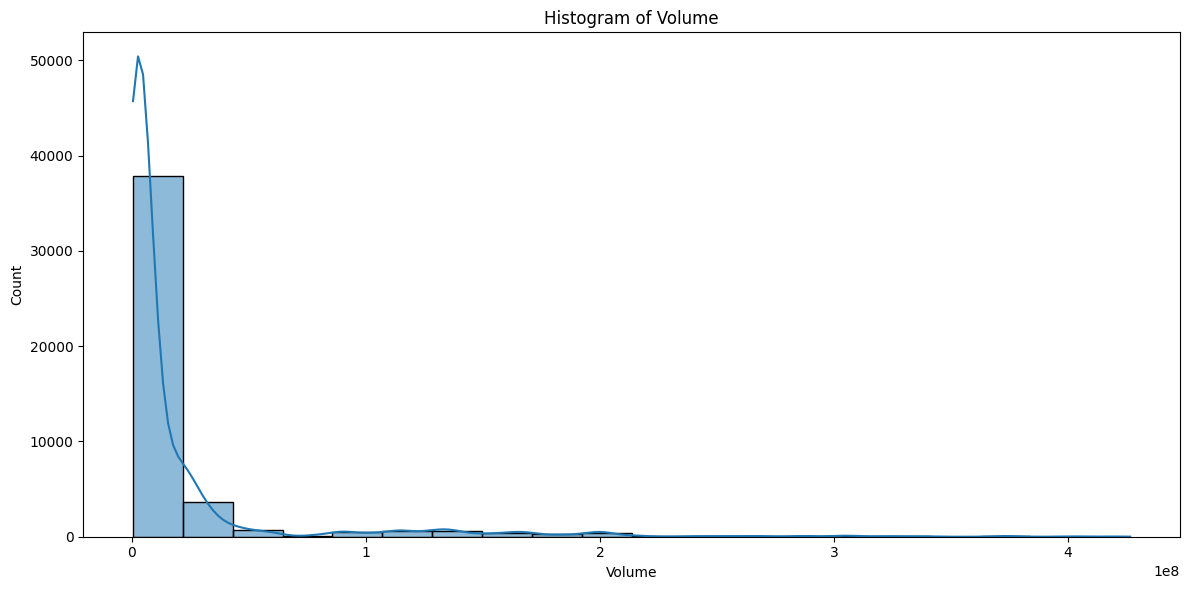

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Generate bar plots, line plots, and histograms
for i in range(1, 4):
    plt.figure(figsize=(12, 6))
    
    if i == 1:
        # Bar plot of 'Total Confirmed cases'
        sns.barplot(x='Date', y='Total Confirmed cases', data=merged_df)
        plt.title('Bar Plot of Total Confirmed cases Over Time')
        plt.xticks(rotation=45, ha='right')
    elif i == 2:
        # Line plot of 'total_tests' over time
        sns.lineplot(x='Date', y='total_tests', data=merged_df)
        plt.title('Line Plot of total_tests Over Time')
    elif i == 3:
        # Histogram of 'Volume'
        sns.histplot(merged_df['Volume'], bins=20, kde=True)
        plt.title('Histogram of Volume')

    plt.tight_layout()
    plt.show()


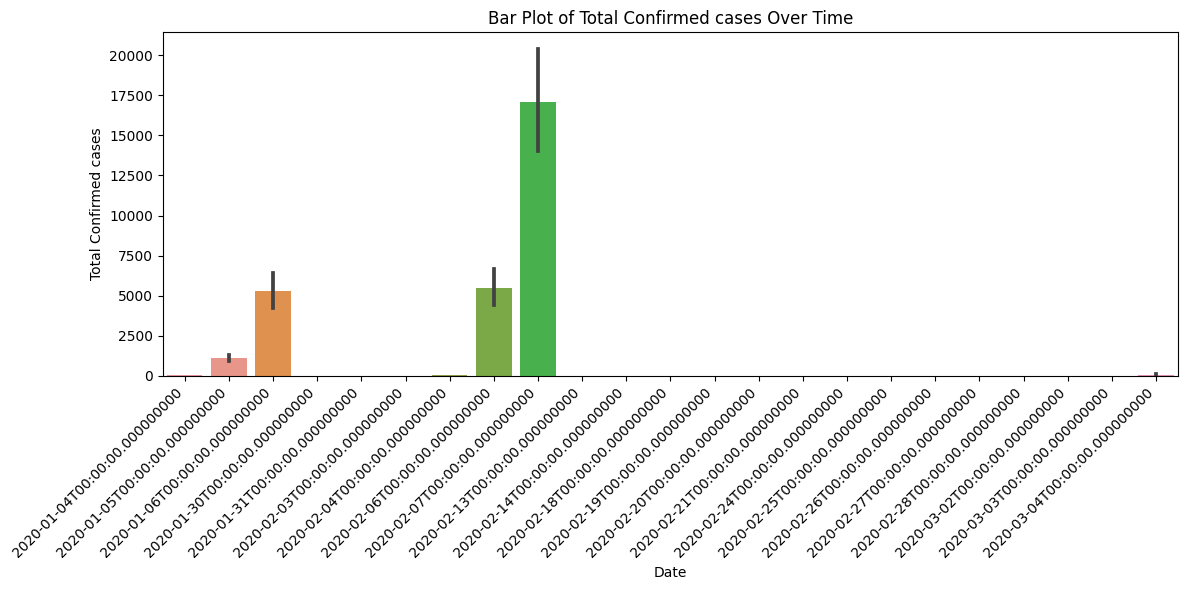

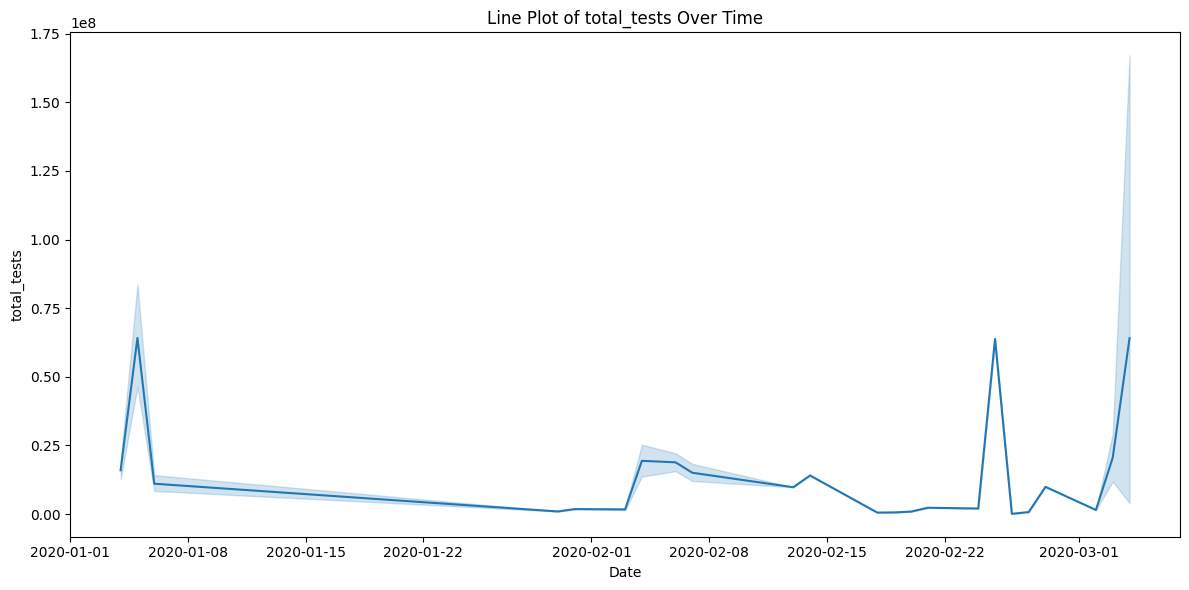

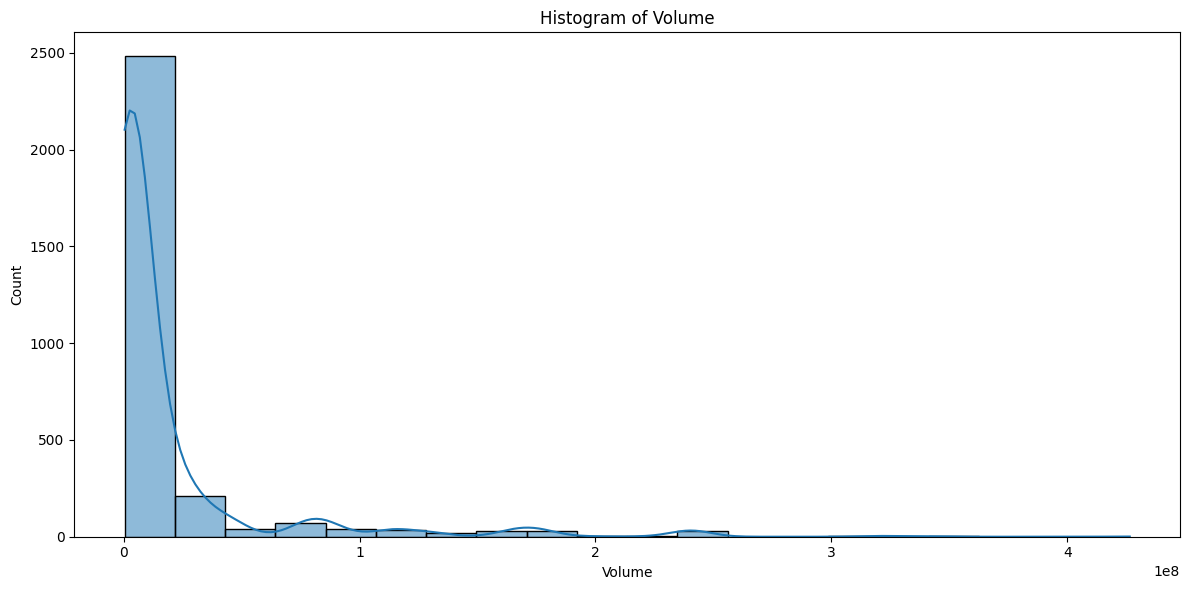

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Consider only the first 100 rows
subset_df = merged_df.head(3000)

# Generate bar plots, line plots, and histograms
for i in range(1, 4):
    plt.figure(figsize=(12, 6))
    
    if i == 1:
        # Bar plot of 'Total Confirmed cases'
        sns.barplot(x='Date', y='Total Confirmed cases', data=subset_df)
        plt.title('Bar Plot of Total Confirmed cases Over Time')
        plt.xticks(rotation=45, ha='right')
    elif i == 2:
        # Line plot of 'total_tests' over time
        sns.lineplot(x='Date', y='total_tests', data=subset_df)
        plt.title('Line Plot of total_tests Over Time')
    elif i == 3:
        # Histogram of 'Volume'
        sns.histplot(subset_df['Volume'], bins=20, kde=True)
        plt.title('Histogram of Volume')

    plt.tight_layout()
    plt.show()


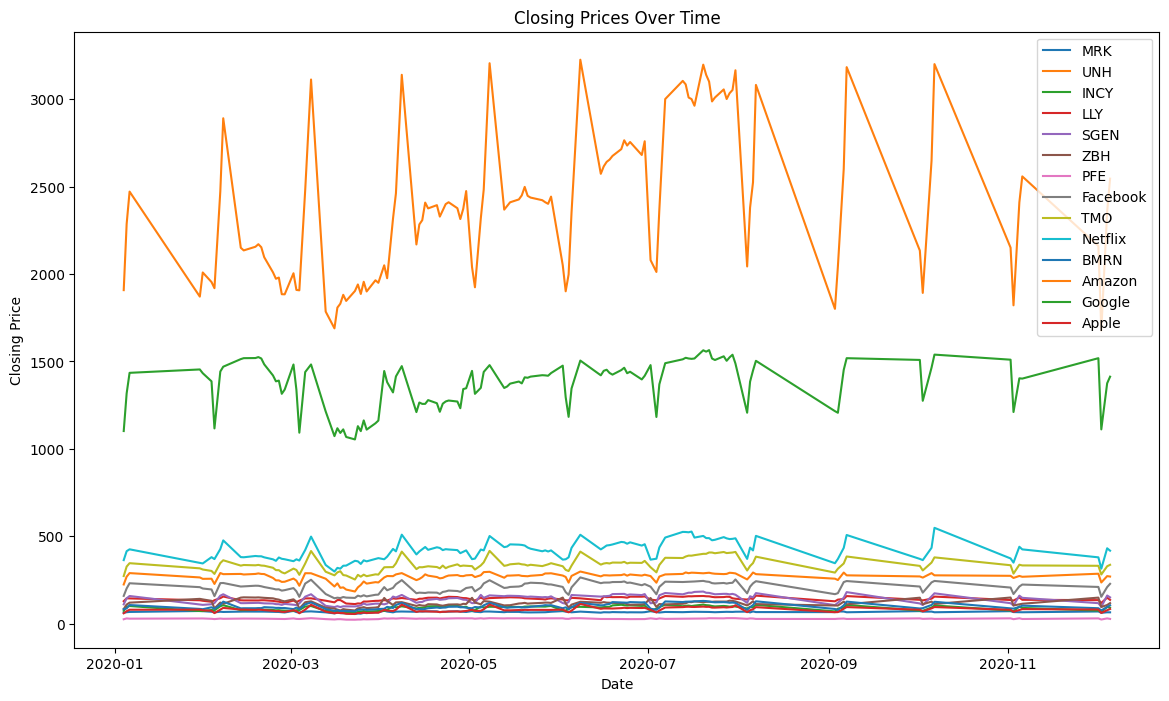

In [30]:
symbols = merged_df['Symbol'].unique()
plt.figure(figsize=(14, 8))
for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.plot(stock_subset['Date'], stock_subset['Close'], label=symbol)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [29]:
merged_df

,Date,High,Low,Open,Close,Volume,Symbol,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,total_tests,total_recovered,active_cases
0,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Andaman and Nicobar Islands,11.7401,92.6586,10,0,1,0,0,1,893980.0,13664.0,336.0
1,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Andhra Pradesh,15.9129,79.7400,83,0,0,43,0,-1,2303690.0,59491.0,58.0
2,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Assam,26.2006,92.9376,1,0,0,0,0,0,2705422.0,863665.0,20538.0
3,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Bihar,25.0961,85.3131,23,1,0,8,0,0,1767199.0,NaN,NaN
4,2020-01-04,64.465414,62.347035,63.773521,63.038921,11665288,MRK,Chandigarh,30.7333,76.7794,16,0,0,3,0,0,2026898.0,303026.0,608.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45677,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Telangana,18.1124,79.0193,4320,165,1993,0,0,0,6019923.0,773421.0,24653.0
45678,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Tripura,23.9408,91.9882,913,1,278,18,0,39,249149.0,43200.0,25.0
45679,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Uttar Pradesh,26.8467,80.9462,12088,345,7292,478,0,421,2633737.0,624673.0,6173.0
45680,2020-12-06,106.809998,103.080002,106.059998,105.720001,1135000,BMRN,Uttarakhand,30.0668,79.0193,1643,15,842,81,0,11,30226868.0,NaN,NaN


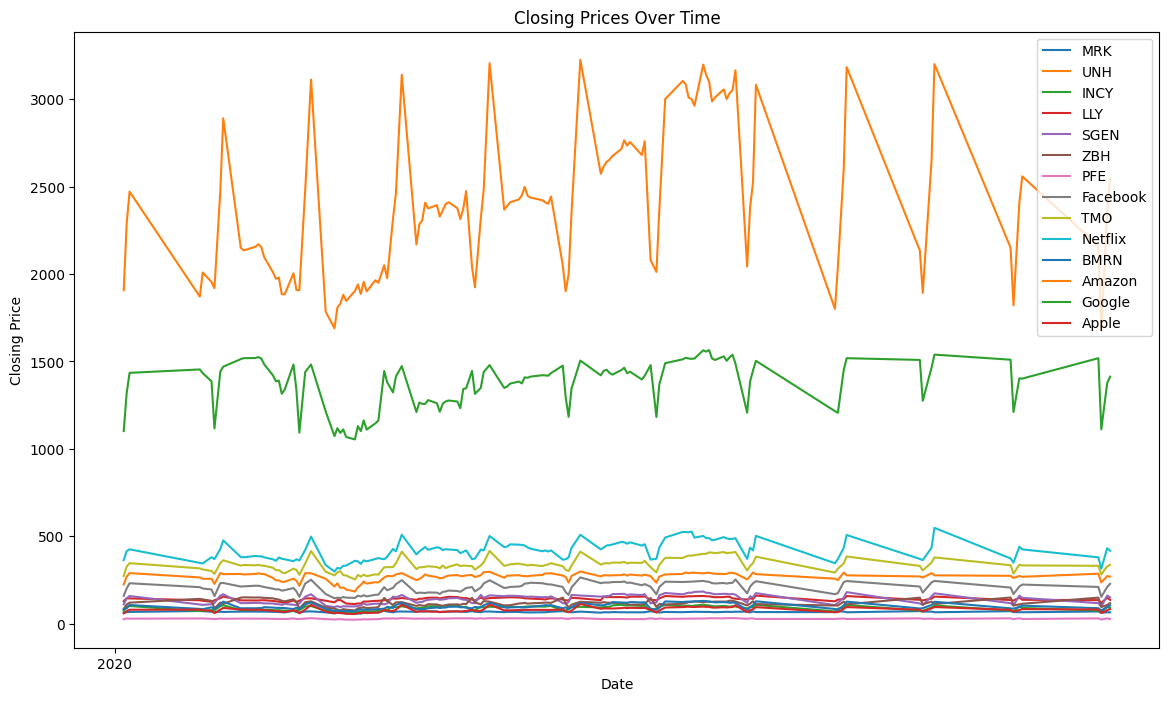

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Get all unique values from the 'Symbol' column
symbols = merged_df['Symbol'].unique()

plt.figure(figsize=(14, 8))

for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.plot(stock_subset['Date'], stock_subset['Close'], label=symbol)

# Set the locator for the x-axis ticks to every year
plt.gca().xaxis.set_major_locator(YearLocator())

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


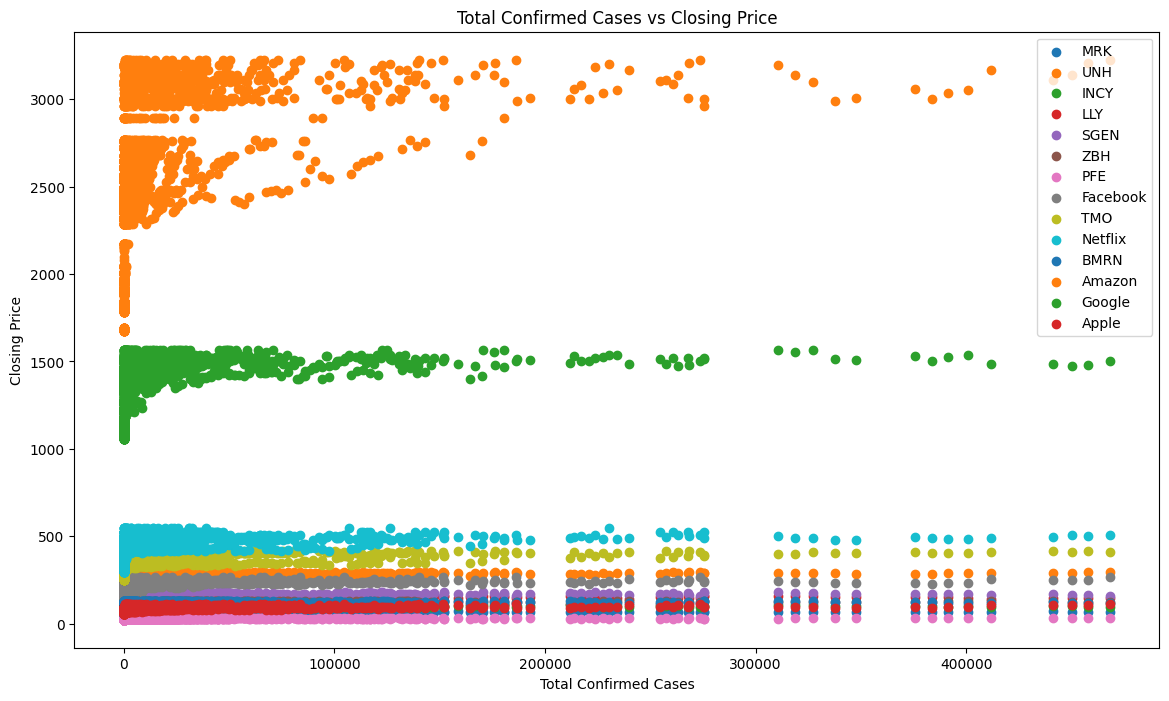

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Get all unique values from the 'Symbol' column
symbols = merged_df['Symbol'].unique()

plt.figure(figsize=(14, 8))

for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.scatter(stock_subset['Total Confirmed cases'], stock_subset['Close'], label=symbol)

plt.title('Total Confirmed Cases vs Closing Price')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


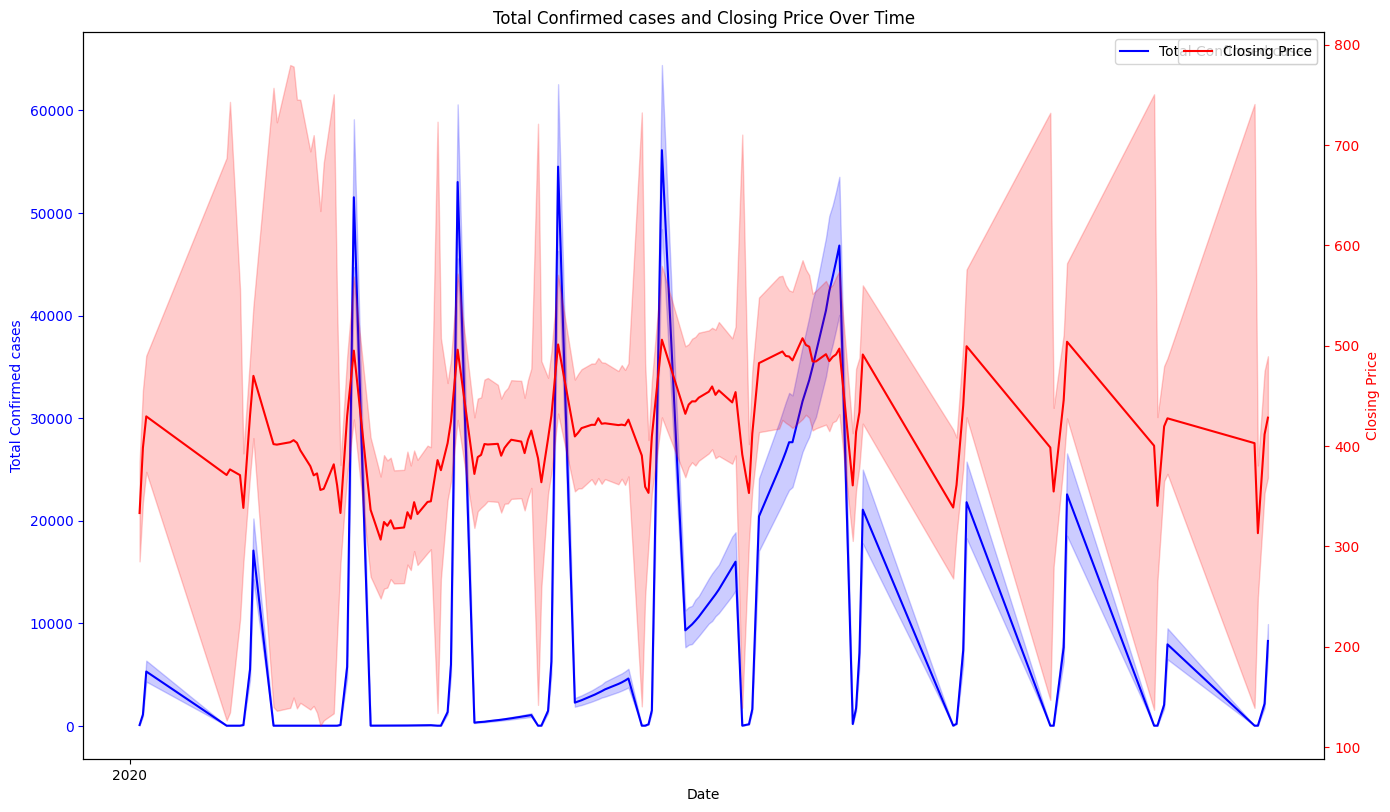

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot 'Total Confirmed cases' on the first y-axis (left)
sns.lineplot(x='Date', y='Total Confirmed cases', data=merged_df, ax=ax1, label='Total Confirmed cases', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Confirmed cases', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis (right) for 'Closing Price'
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Close', data=merged_df, ax=ax2, label='Closing Price', color='r')
ax2.set_ylabel('Closing Price', color='r')
ax2.tick_params('y', colors='r')

# Set the locator for the x-axis ticks to every year
ax1.xaxis.set_major_locator(YearLocator())

# Show the legend
fig.tight_layout()
plt.title('Total Confirmed cases and Closing Price Over Time')
plt.show()


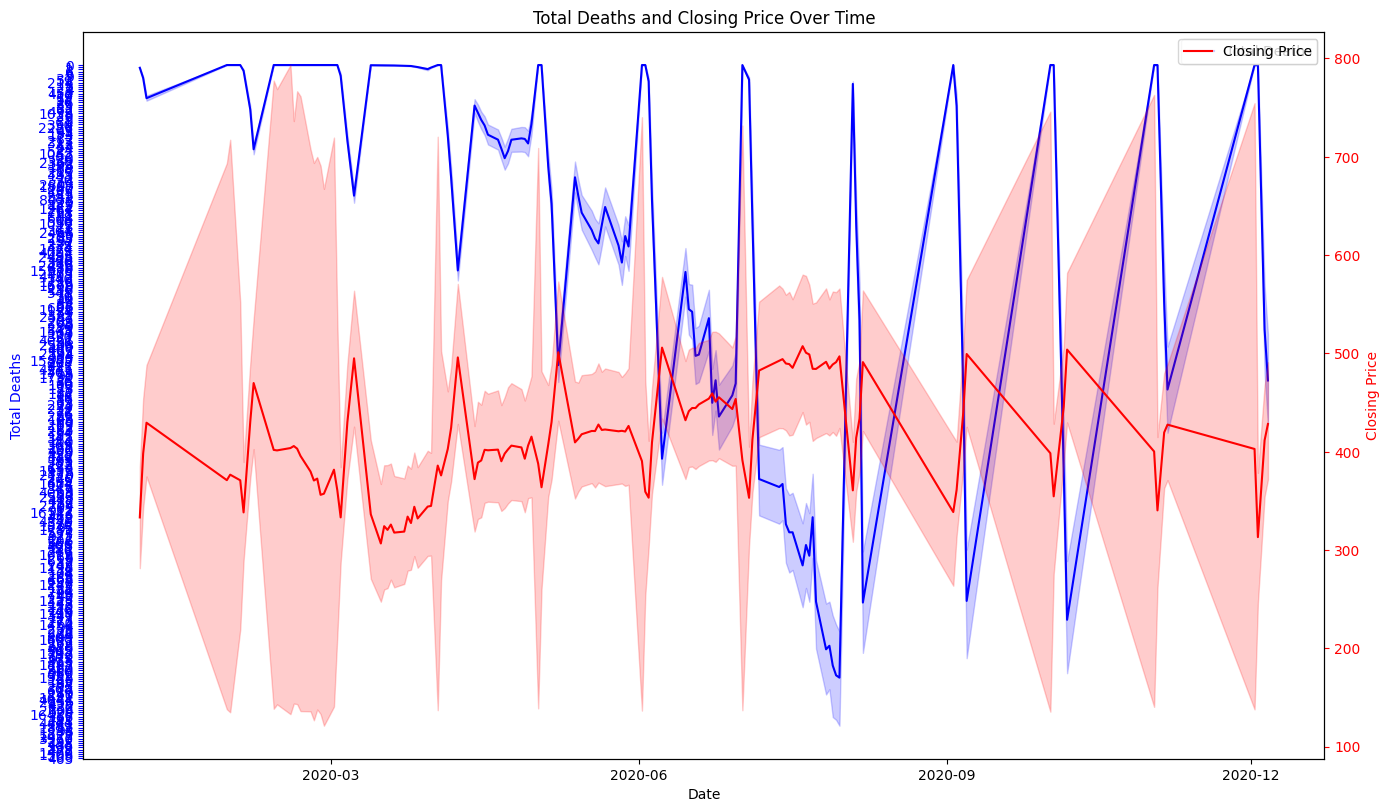

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot 'Total Deaths' on the first y-axis (left)
sns.lineplot(x='Date', y='Death', data=merged_df, ax=ax1, label='Total Deaths', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Deaths', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis (right) for 'Closing Price'
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='Close', data=merged_df, ax=ax2, label='Closing Price', color='r')
ax2.set_ylabel('Closing Price', color='r')
ax2.tick_params('y', colors='r')

# Set the locator for the x-axis ticks to every 3 months
ax1.xaxis.set_major_locator(MonthLocator(interval=3))

# Show the legend
fig.tight_layout()
plt.title('Total Deaths and Closing Price Over Time')
plt.show()


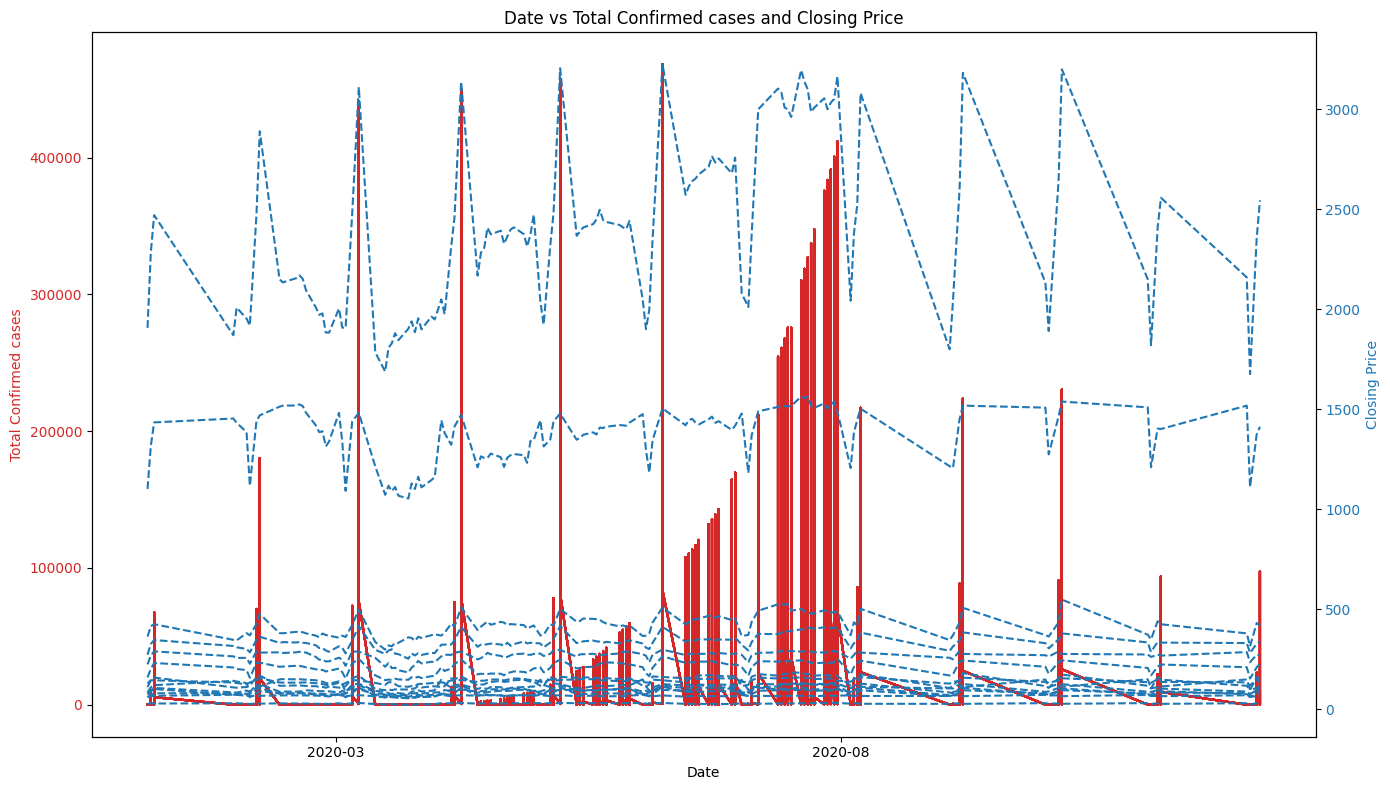

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Set the 'Date' column as datetime if it's not already
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Get unique symbols for each line
symbols = merged_df['Symbol'].unique()

# Create a subplot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot 'Total Confirmed cases'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Confirmed cases', color='tab:red')
for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    ax1.plot(stock_subset['Date'], stock_subset['Total Confirmed cases'], label=symbol, color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Date vs Total Confirmed cases and Closing Price')

# Create a secondary y-axis for 'Closing Price'
ax2 = ax1.twinx()
ax2.set_ylabel('Closing Price', color='tab:blue')
for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    ax2.plot(stock_subset['Date'], stock_subset['Close'], label=symbol, color='tab:blue', linestyle='dashed')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Set the locators for the x-axis ticks to every 5 months
ax1.xaxis.set_major_locator(MonthLocator(interval=5))
ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m"))

fig.tight_layout()
plt.show()


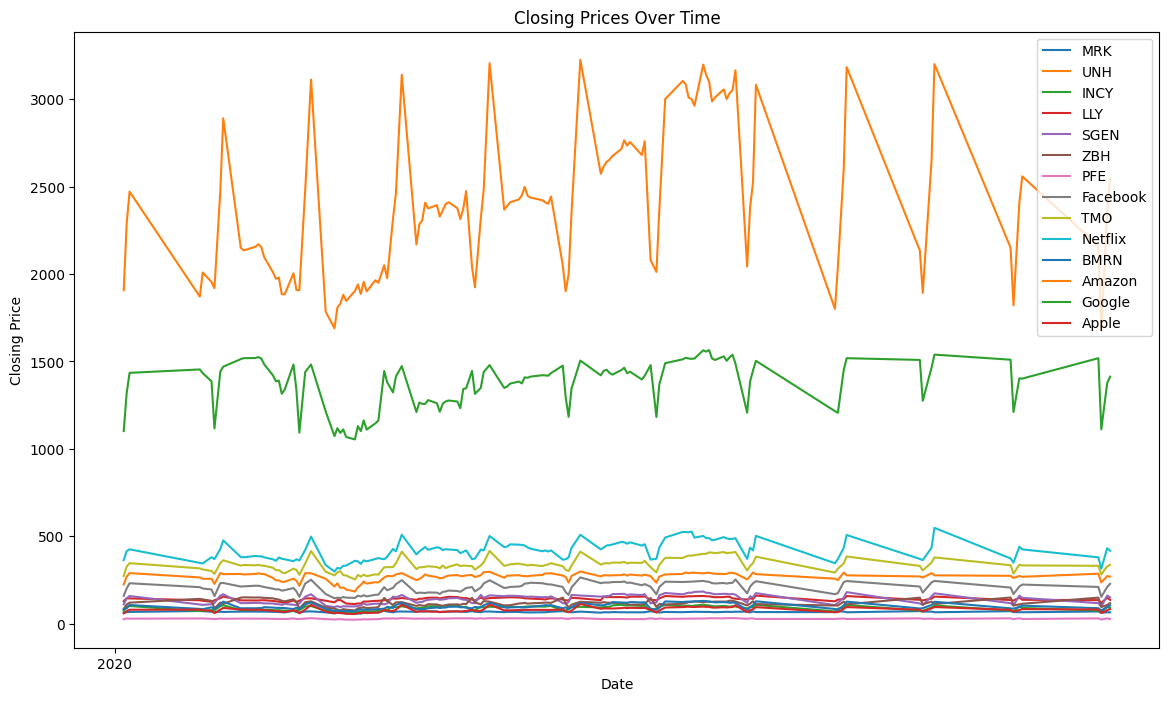

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Get all unique values from the 'Symbol' column
symbols = merged_df['Symbol'].unique()

plt.figure(figsize=(14, 8))

for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.plot(stock_subset['Date'], stock_subset['Close'], label=symbol)

# Set the locator for the x-axis ticks to every year
plt.gca().xaxis.set_major_locator(YearLocator())

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


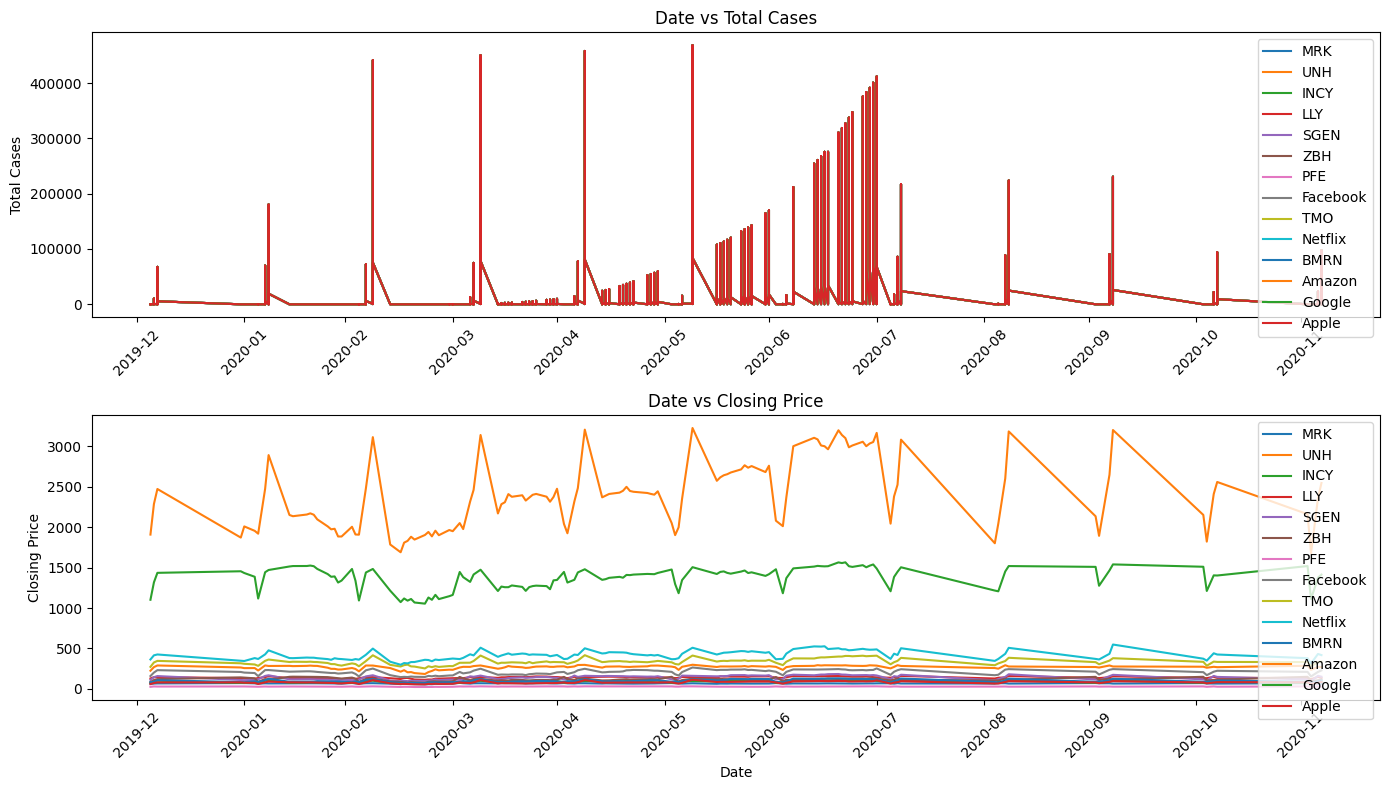

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Set the 'Date' column as the datetime index
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df.set_index('Date', inplace=True)

# Get all unique values from the 'Symbol' column
symbols = merged_df['Symbol'].unique()

plt.figure(figsize=(14, 8))

# Plot Date vs Total Cases
plt.subplot(2, 1, 1)
for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.plot(stock_subset.index, stock_subset['Total Confirmed cases'], label=symbol)

plt.title('Date vs Total Cases')
plt.ylabel('Total Cases')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=-1))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.gca().tick_params(axis='x', rotation=45)

# Plot Date vs Closing Price
plt.subplot(2, 1, 2)
for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    plt.plot(stock_subset.index, stock_subset['Close'], label=symbol)

plt.title('Date vs Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.gca().xaxis.set_major_locator(MonthLocator(bymonthday=-1))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.gca().tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Assuming your DataFrame is named 'merged_df'
# Replace this with the actual name of your DataFrame

# Get all unique values from the 'Symbol' column
symbols = merged_df['Symbol'].unique()

plt.figure(figsize=(14, 8))

for symbol in symbols:
    stock_subset = merged_df[merged_df['Symbol'] == symbol]
    
    # Plot Total cases
    plt.plot(stock_subset['Date'], stock_subset['Total Confirmed cases'], label=f'Total cases - {symbol}', linestyle='--', marker='o')
    
    # Plot Closing Price
    plt.plot(stock_subset['Date'], stock_subset['Close'], label=f'Closing Price - {symbol}', linestyle='-', marker='o')

# Set the locator for the x-axis ticks to every 3 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=3))

plt.title('Total Cases and Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Count/Price')
plt.legend()
plt.show()


KeyError: 'Date'

<Figure size 1400x800 with 0 Axes>

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your GeoJSON file is named 'india_states.geojson'
# Replace this with the actual path to your GeoJSON file

geojson_path = 'path/to/india_states.geojson'  # Replace with the actual path

# Read the GeoJSON file into a GeoDataFrame
geo_df = gpd.read_file(geojson_path)

# Merge your DataFrame (merged_df) with the GeoDataFrame on the 'Name of State / UT' column
merged_geo_df = geo_df.merge(df3, how='left', left_on='ST_NM', right_on='Name of State / UT')

# Plot the map graph
fig, ax = plt.subplots(figsize=(15, 10))
merged_geo_df.plot(column='Total Confirmed cases', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total Confirmed cases by State/UT')
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: path/to/india_states.geojson: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Python\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\smula\AppData\Local\Temp\ipykernel_15752\960267633.py", line 10, in <module>
    geo_df = gpd.read_file(geojson_path)
  File "C:\Python\lib\site-packages\geopandas\io\file.py", line 297, in _read_file
    return _read_file_fiona(
  File "C:\Python\lib\site-packages\geopandas\io\file.py", line 338, in _read_file_fiona
    with reader(path_or_bytes, **kwargs) as features:
  File "C:\Python\lib\site-packages\fiona\env.py", line 457, in wrapper
    return f(*args, **k

In [43]:
pip install geopandas

     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     ---------------------------------------- 51.1/51.1 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -------------------------- ------------- 0.7/1.1 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 1.1/22.9 MB 23.3 MB/s eta 0:00:01
   --- ------------------------------------ 2.3/22.9 MB 24.1 MB/s eta 0:00:01
   ----- ---------------------------------- 3.4/22.9 MB 24.0 MB/s eta 0:00:01
   -------- ------------------------------- 4.7/22.9 MB 27.2 MB/s eta 0:00:01
   -------- ------------------------------- 5.1/22.9 MB 23.3 MB/s eta 0:00:01
   --------- ------------------------------ 5.7/22.9 MB 21.4 MB/s eta 0:00:01
   ----------- ---------------------------- 6.3/22.9 MB 20.2 MB/s eta 0:00:01
   ----------- -

In [7]:
merged_df.to_csv('Output.csv')